### Module import

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

### Data Load

In [2]:
train_dataset = datasets.MNIST(root="./data",
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root="./data",
                              train=False,
                              transform=transforms.ToTensor(),
                              download=True)

In [3]:
print("train_dataset train_data :", train_dataset.train_data.size())
print("train_dataset train_labels:", train_dataset.train_labels.size())
print("test_dataset test_data :", test_dataset.test_data.size())
print("test_dataset test_labels :", test_dataset.test_labels.size())

train_dataset train_data : torch.Size([60000, 28, 28])
train_dataset train_labels: torch.Size([60000])
test_dataset test_data : torch.Size([10000, 28, 28])
test_dataset test_labels : torch.Size([10000])


### Build Model

In [4]:
batch_size = 100
n_iters = 3000
num_epochs = int(n_iters / (len(train_dataset) / batch_size))

In [8]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

In [9]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        # conv 1                      # (1,28,28)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()        # (16,28,28)  28+4-5+1
        # max 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
                                      # (16,14,14)
        # conv 2
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ReLU()        # (32,14,14) 14+4-5+1
        
        # max 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
                                      # (32, 7, 7)
        # fully connected layer
        self.fc1 = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        # conv 1
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        # conv 2
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)

        # flatten
        x = x.view(x.size(0), -1)
        out = self.fc1(x)

        return out

In [10]:
model = CNNModel()
loss_func = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Train model

In [11]:
iters = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # convert tensor to Variable
        images = Variable(images)
        labels = Variable(labels)

        # clear gradients w.r.t parameters
        optimizer.zero_grad()

        # forward pass
        outputs = model(images)

        # calculate loss
        loss = loss_func(outputs, labels)

        # get gradient w.r.t parameters
        loss.backward()

        # update parameters
        optimizer.step()

        iters += 1

        if iters % 500 == 0:
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = Variable(images)
                # predict with current weights
                outputs = model(images)
                # get predictions via max-value
                _, predicted = torch.max(outputs.data, 1)
                #
                total += labels.size(0)
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total
            print("Iteration: {}. Loss: {}. Accuracy: {}".format(iters, loss.data[0], accuracy))

Iteration: 500. Loss: 0.464537650346756. Accuracy: 87.83
Iteration: 1000. Loss: 0.24561451375484467. Accuracy: 92.38
Iteration: 1500. Loss: 0.239502415060997. Accuracy: 94.06
Iteration: 2000. Loss: 0.10764993727207184. Accuracy: 95.15
Iteration: 2500. Loss: 0.12052185833454132. Accuracy: 95.94
Iteration: 3000. Loss: 0.1834280788898468. Accuracy: 96.81


### Show result

In [12]:
# get filters from parameters:
print(list(model.parameters())[0].size())    # (16, 1, 5, 5)

torch.Size([16, 1, 5, 5])


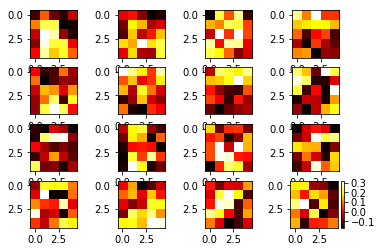

In [13]:
fig = plt.figure()
axes = []
for i in range(4):
    for j in range(4):
        ax = plt.subplot2grid((4,4), (i,j), colspan=1, rowspan=1)
        axes.append(ax)

for i in range(16):
    im = axes[i].imshow(list(model.parameters())[0].data.numpy()[i,0,:,:], cmap="hot")
plt.colorbar(im)
plt.show()